<a href="https://colab.research.google.com/github/britssc/ecuadorian_fake_news_detection/blob/main/models_testing/DataSetAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake News Detection: Traditional ML models + RoBERTa finetuning

Ecuador's 2025 Election Dataset (623 News)

In [1]:
!pip install SciencePlots
import matplotlib.pyplot as plt
#plt.style.use('seaborn-v0_8-white')
import numpy as np
import os

## DataSet Analysis

## 1. Reading the data set

In [4]:
import pandas as pd
import scienceplots
plt.style.use(['science', 'notebook', 'no-latex'])

data = pd.read_excel('Datos.xlsx')

## 2. Visualization of the data set

In [5]:
# Tweets of each type found in the training dataset.
data['real'].value_counts()

,count
real,
1,323
0,299


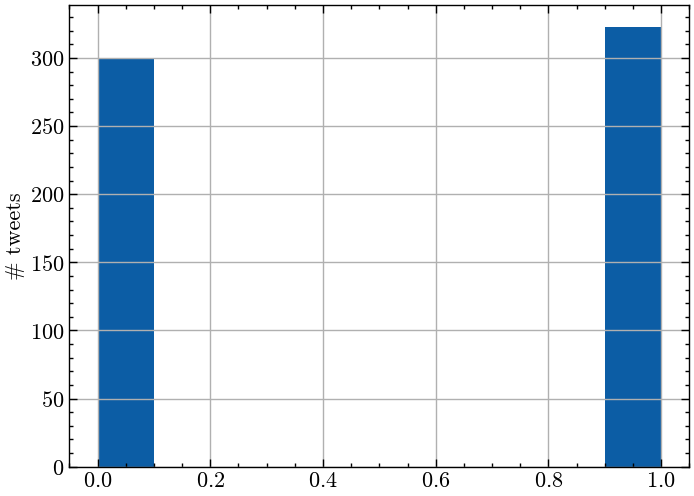

In [6]:

data['real'].hist()
plt.ylabel("# tweets")
plt.show()

Always perform an exploratory analysis of the data distribution to determine the best way to solve the problem.

### Number of words per Tweet

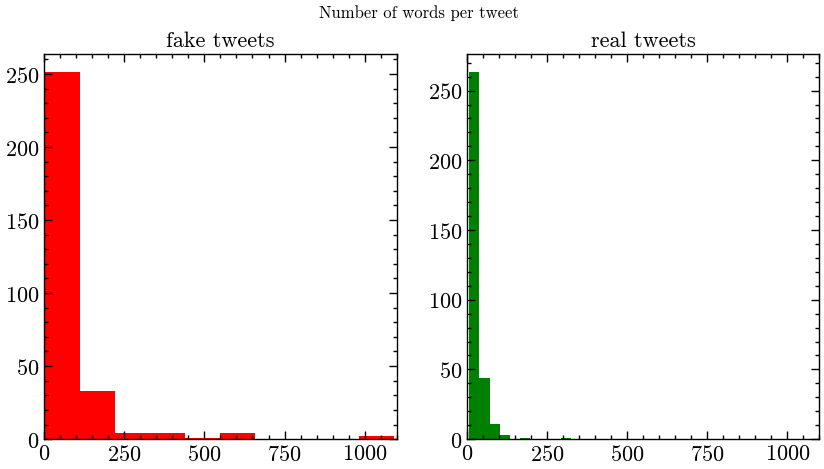

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# We calculate the number of words
tweet_len_0 = data[data['real'] == 0]['text'].str.split().map(lambda x: len(x))
tweet_len_1 = data[data['real'] == 1]['text'].str.split().map(lambda x: len(x))

ax1.hist(tweet_len_0, color='red')
ax1.set_title('fake tweets')
ax1.set_xlim([0,1100])

ax2.hist(tweet_len_1, color='green')
ax2.set_title('real tweets')
ax2.set_xlim([0,1100])

fig.suptitle('Number of words per tweet')

plt.show()

### Number of unique words per Tweet

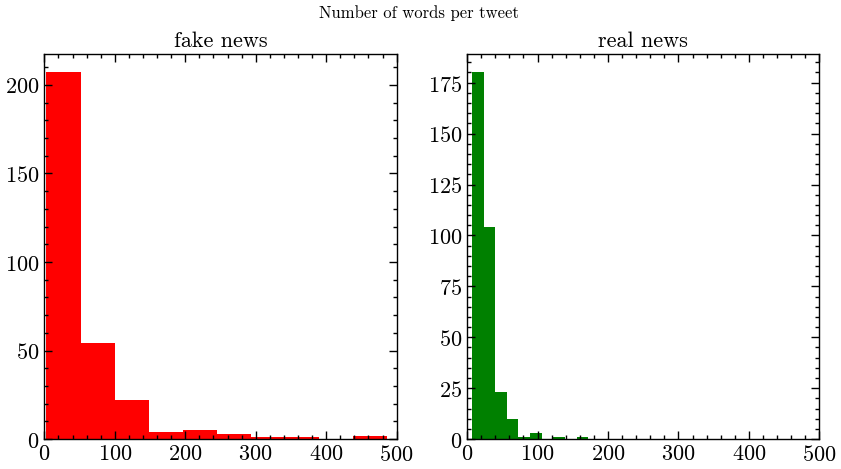

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# We calculate the number of words
tweet_len_0 = data[data['real'] == 0]['text'].str.split().map(lambda x: len(set(x)))
tweet_len_1 = data[data['real'] == 1]['text'].str.split().map(lambda x: len(set(x)))

ax1.hist(tweet_len_0, color='red')
ax1.set_title('fake news')
ax1.set_xlim([0,500])

ax2.hist(tweet_len_1, color='green')
ax2.set_title('real news')
ax2.set_xlim([0,500])

fig.suptitle('Number of words per tweet')

plt.show()

### Average word length per Tweet

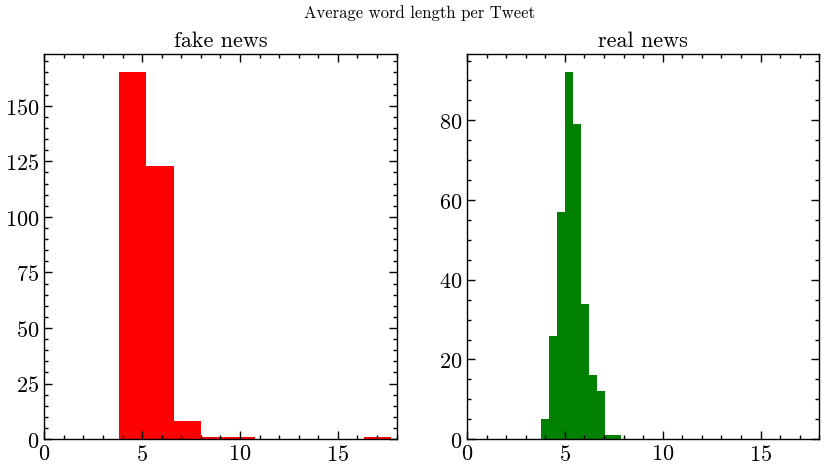

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# We calculate the number of words
tweet_len_0 = data[data['real'] == 0]['text'].str.split().map(lambda x: np.mean([len(i) for i in x]))
tweet_len_1 = data[data['real'] == 1]['text'].str.split().map(lambda x: np.mean([len(i) for i in x]))

ax1.hist(tweet_len_0, color='red')
ax1.set_title('fake news')
ax1.set_xlim([0,18])

ax2.hist(tweet_len_1, color='green')
ax2.set_title('real news')
ax2.set_xlim([0,18])

fig.suptitle('Average word length per Tweet')

plt.show()

### Number of characters per tweet

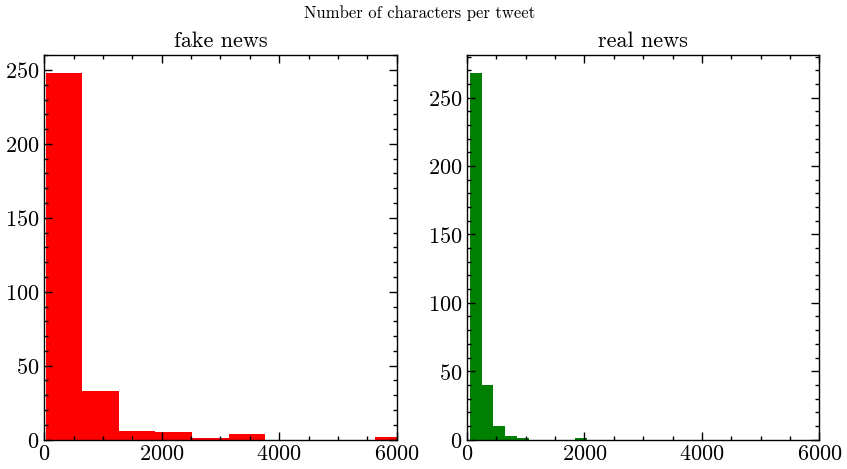

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Calculamos el número de caracteres por tweet
tweet_len_0 = data[data['real'] == 0]['text'].str.len()
tweet_len_1 = data[data['real'] == 1]['text'].str.len()

ax1.hist(tweet_len_0, color='red')
ax1.set_title('fake news')
ax1.set_xlim([0,6000])

ax2.hist(tweet_len_1, color='green')
ax2.set_title('real news')
ax2.set_xlim([0,6000])

fig.suptitle('Number of characters per tweet')

plt.show()

We could continue to calculate input characteristics such as the following:
* Number of end words per Tweet
* Number of urls per Tweet
* Average number of characters per Tweet
* Number of characters per Tweet
* Number of punctuation marks per Tweet
* Number of hashtags per Tweet
* Number of @'s per tweet

### Most used stopwords

These words do not have a meaning by themselves, but modify or accompany others, this group usually consists of articles, pronouns, prepositions, adverbs and even some verbs.

In natural language data processing they are filtered before or after the process itself, they are not considered because they have no meaning, in the case of search engines such as Google they are not considered at the time of positioning, but they are considered at the time of displaying search results.

In [11]:
from nltk.corpus import stopwords
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [12]:
def plot_stopwords(label):
    tweets_stopwords = {}
    for words in data[data['real'] == label]['text'].str.split():
        sw = list(set(words).intersection(stopwords.words('spanish')))
        for w in sw:
            if w in tweets_stopwords.keys():
                tweets_stopwords[w] += 1
            else:
                tweets_stopwords[w] = 1

    top = sorted(tweets_stopwords.items(), key=lambda x:x[1],reverse=True)[:10]
    plt.bar(*zip(*top))
    plt.show()

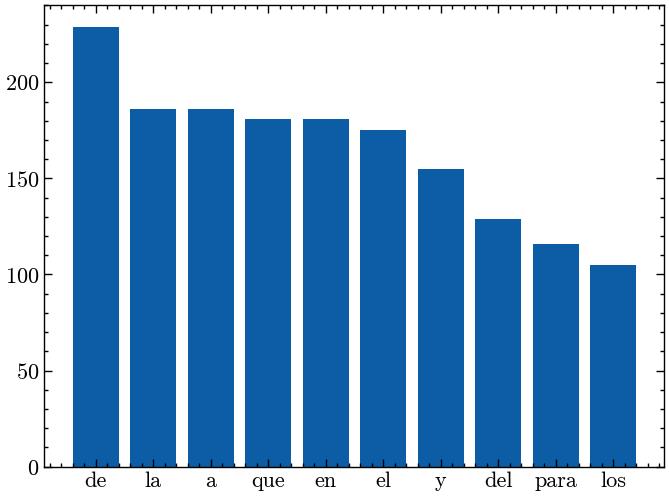

In [13]:
#Fake news.
from nltk.corpus import stopwords
plot_stopwords(0)

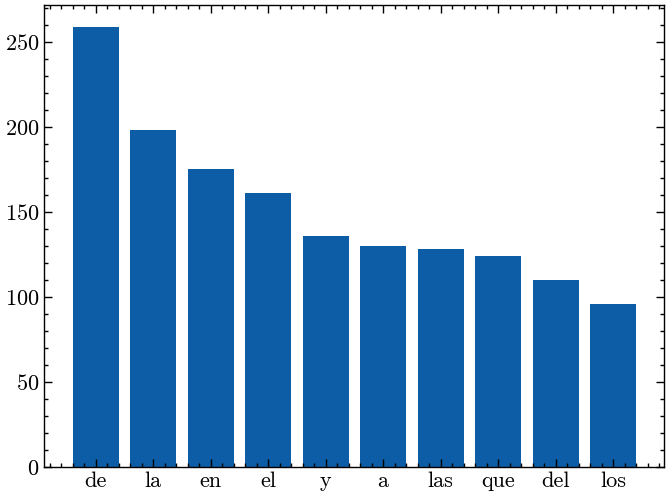

In [14]:
# real words
plot_stopwords(1)

### Punctuation analysis

In [15]:
import string

def plot_punctuation(label):
    tweets_stopwords = {}
    for words in data[data['real'] == label]['text'].str.split():
        sw = list(set(words).intersection(string.punctuation))
        for w in sw:
            if w in tweets_stopwords.keys():
                tweets_stopwords[w] += 1
            else:
                tweets_stopwords[w] = 1

    top = sorted(tweets_stopwords.items(), key=lambda x:x[1],reverse=True)[:20]
    plt.figure(figsize=(10, 5))
    plt.bar(*zip(*top))
    plt.show()

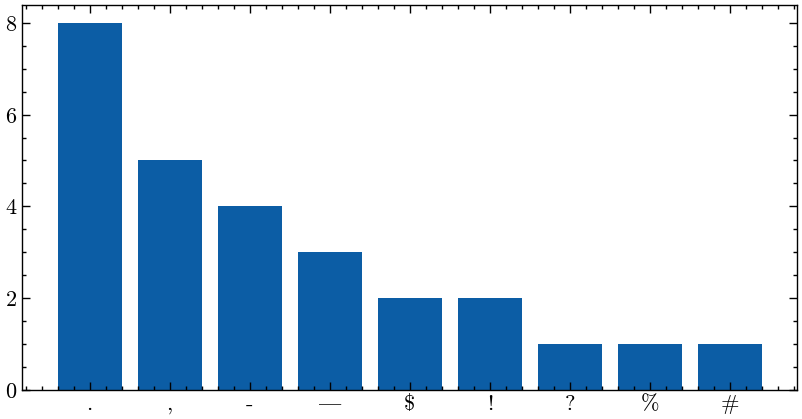

In [16]:
#fake news
plot_punctuation(0)

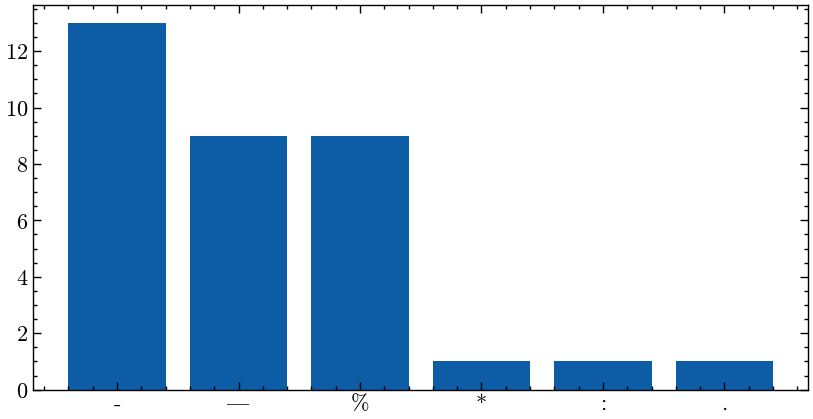

In [17]:
# real news
plot_punctuation(1)

### Ngram analysis

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(2, 2))
sum_words = cv.fit_transform(data['text']).sum(axis=0)

# We calculate
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)[:20]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 225 (\N{LATIN SMALL LETTER A WITH ACUTE}) missing from font(s) cmr10.
  fig.canvas.print_figure(bytes_io, **kw)


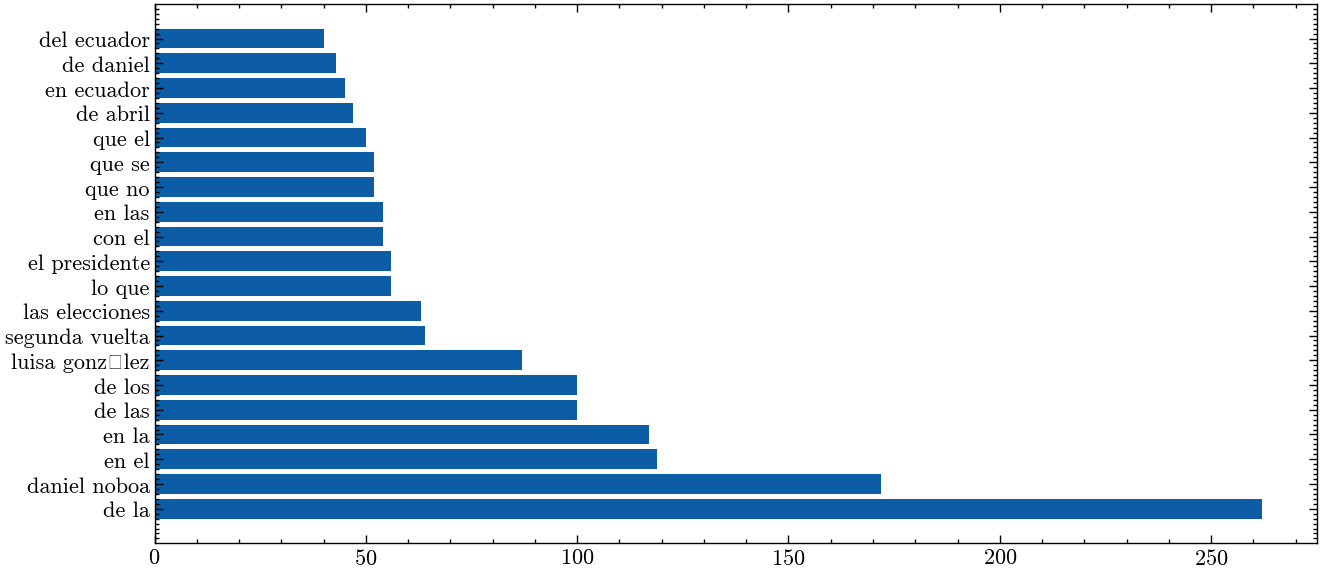

In [19]:
plt.figure(figsize=(15, 7))
plt.barh(*zip(*words_freq))
plt.show()

<ipython-input-20-265ba10350c6>:31: UserWarning: Glyph 225 (\N{LATIN SMALL LETTER A WITH ACUTE}) missing from font(s) cmr10.
  plt.tight_layout()


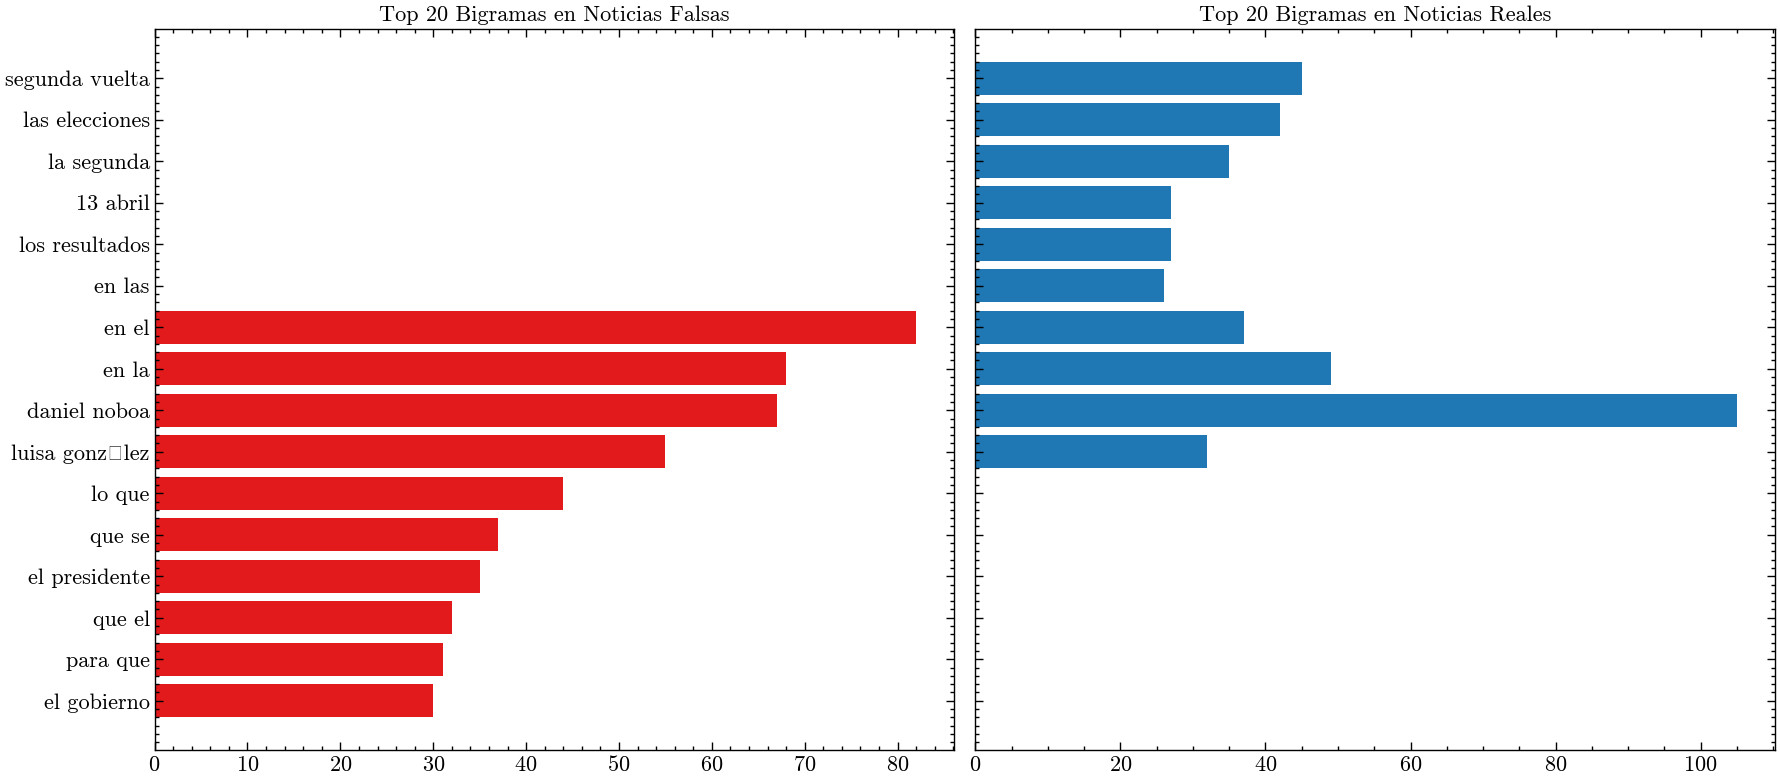

In [20]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

fake_texts = data[data['real'] == 0]['text']
real_texts = data[data['real'] == 1]['text']

def get_top_ngrams(texts, n=10):
    cv = CountVectorizer(ngram_range=(2, 2), stop_words='english')
    sum_words = cv.fit_transform(texts).sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    return sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]


top_fake = get_top_ngrams(fake_texts)
top_real = get_top_ngrams(real_texts)


fig, axs = plt.subplots(1, 2, figsize=(18, 8), sharey=True)


axs[0].barh(*zip(*reversed(top_fake)), color='#e31a1c')
axs[0].set_title('Top 20 Bigramas en Noticias Falsas')
axs[0].invert_yaxis()


axs[1].barh(*zip(*reversed(top_real)), color='#1f78b4')
axs[1].set_title('Top 20 Bigramas en Noticias Reales')
axs[1].invert_yaxis()

plt.tight_layout()
plt.show()

<ipython-input-56-0e3228e5addb>:28: UserWarning: Glyph 225 (\N{LATIN SMALL LETTER A WITH ACUTE}) missing from font(s) cmr10.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 225 (\N{LATIN SMALL LETTER A WITH ACUTE}) missing from font(s) cmr10.
  fig.canvas.print_figure(bytes_io, **kw)


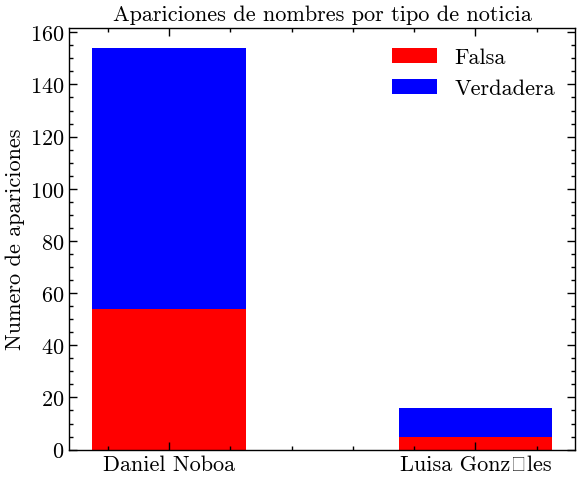

In [56]:

names = ['daniel noboa', 'luisa gonzales']
counts = {name: {0: 0, 1: 0} for name in names}


for _, row in data.iterrows():
    text = row['text'].lower()
    label = row['real']
    for name in names:
        if name in text:
            counts[name][label] += 1

labels = ['Daniel Noboa', 'Luisa Gonzáles']
falsas = [counts[name][0] for name in names]
verdaderas = [counts[name][1] for name in names]


x = [0, 1]
bar_width = 0.5

plt.figure(figsize=(6, 5))
plt.bar(x, falsas, width=bar_width, color='red', label='Falsa')
plt.bar(x, verdaderas, width=bar_width, bottom=falsas, color='blue', label='Verdadera')

plt.xticks(x, labels)
plt.ylabel('Numero de apariciones')
plt.title('Apariciones de nombres por tipo de noticia')
plt.legend()
plt.tight_layout()
plt.show()
